In [1]:
import urllib.request
import os
import numpy as np
import pandas as pd
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
train_df = pd.read_csv("/home/wang/pywork/machine-learning-realtek-regression/train-v3.csv")
test_df = pd.read_csv("/home/wang/pywork/machine-learning-realtek-regression/test-v3.csv")
valid_df = pd.read_csv("/home/wang/pywork/machine-learning-realtek-regression/valid-v3.csv")

In [3]:
cols = ['price','sale_yr','sale_month','sale_day','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
                'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
                'zipcode','lat','long','sqft_living15','sqft_lot15']
#22
cols_test = ['id','sale_yr','sale_month','sale_day','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
                'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
                'zipcode','lat','long','sqft_living15','sqft_lot15']
#22
train_df = train_df[cols]
valid_df = valid_df[cols]

test_df = test_df[cols_test]

In [4]:
all_df = pd.concat([train_df,valid_df])

In [5]:
train_ndarray = all_df.values
train_Features = train_ndarray[:,1:]#21
train_Label = train_ndarray[:,0] 

newtrain_Features = preprocessing.scale(train_Features)

In [6]:
test_df2 = test_df.drop(['id'],axis = 1)#21

test_ndarray = test_df2.values
test_Features = test_ndarray[:,0:]

newtest_Features = ((test_Features - train_Features.mean(axis = 0))/train_Features.std(axis=0))

In [7]:
model = Sequential()

In [8]:
model.add(Dense(units=400,input_dim=21,
               kernel_initializer='uniform',
               activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(units=400,
               kernel_initializer='uniform',
               activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(units=200,
               kernel_initializer='uniform',
               activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(units=50,
               kernel_initializer='uniform',
               activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(units=10,
               kernel_initializer='uniform',
               activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(units=1,
               kernel_initializer='uniform',
               ))

model.compile(loss='MAE',
            optimizer='adam',metrics = ['accuracy'])

In [9]:
train_history = model.fit(x=newtrain_Features,
                         y=train_Label,
                         validation_split=0.1,
                         epochs=100,
                         batch_size=30,verbose=2)

Train on 13615 samples, validate on 1513 samples
Epoch 1/100
 - 2s - loss: 290179.7191 - accuracy: 0.0000e+00 - val_loss: 122911.3676 - val_accuracy: 0.0000e+00
Epoch 2/100
 - 2s - loss: 199077.9939 - accuracy: 0.0000e+00 - val_loss: 112844.4883 - val_accuracy: 0.0000e+00
Epoch 3/100
 - 2s - loss: 198601.1262 - accuracy: 0.0000e+00 - val_loss: 126391.5145 - val_accuracy: 0.0000e+00
Epoch 4/100
 - 2s - loss: 198301.7859 - accuracy: 0.0000e+00 - val_loss: 116993.4447 - val_accuracy: 0.0000e+00
Epoch 5/100
 - 2s - loss: 199761.5022 - accuracy: 0.0000e+00 - val_loss: 113113.1792 - val_accuracy: 0.0000e+00
Epoch 6/100
 - 2s - loss: 198120.0210 - accuracy: 7.3448e-05 - val_loss: 108761.0834 - val_accuracy: 0.0000e+00
Epoch 7/100
 - 2s - loss: 196691.6620 - accuracy: 0.0000e+00 - val_loss: 106893.0742 - val_accuracy: 0.0000e+00
Epoch 8/100
 - 2s - loss: 195907.1346 - accuracy: 0.0000e+00 - val_loss: 114091.2541 - val_accuracy: 0.0000e+00
Epoch 9/100
 - 2s - loss: 196658.4455 - accuracy: 0.000

Epoch 74/100
 - 2s - loss: 192319.9543 - accuracy: 0.0000e+00 - val_loss: 108078.7947 - val_accuracy: 0.0000e+00
Epoch 75/100
 - 2s - loss: 192180.1145 - accuracy: 0.0000e+00 - val_loss: 124680.7811 - val_accuracy: 0.0000e+00
Epoch 76/100
 - 2s - loss: 192146.0440 - accuracy: 0.0000e+00 - val_loss: 111131.0627 - val_accuracy: 0.0000e+00
Epoch 77/100
 - 2s - loss: 191571.4716 - accuracy: 0.0000e+00 - val_loss: 110637.0232 - val_accuracy: 0.0000e+00
Epoch 78/100
 - 2s - loss: 192484.6186 - accuracy: 0.0000e+00 - val_loss: 116558.3007 - val_accuracy: 0.0000e+00
Epoch 79/100
 - 2s - loss: 191322.2768 - accuracy: 0.0000e+00 - val_loss: 100634.0646 - val_accuracy: 0.0000e+00
Epoch 80/100
 - 2s - loss: 192377.2275 - accuracy: 0.0000e+00 - val_loss: 100703.3223 - val_accuracy: 0.0000e+00
Epoch 81/100
 - 2s - loss: 192687.3739 - accuracy: 0.0000e+00 - val_loss: 101638.6363 - val_accuracy: 0.0000e+00
Epoch 82/100
 - 2s - loss: 191811.6307 - accuracy: 0.0000e+00 - val_loss: 110084.0519 - val_accu

In [10]:
train_predict = model.predict(newtest_Features)

In [11]:
train_predict[:5]

array([[454116.97],
       [591336.25],
       [427270.53],
       [393938.72],
       [664087.6 ]], dtype=float32)

In [12]:
outcome = pd.DataFrame(train_predict,columns = ['price'])

In [13]:
outcome[:5]

,price
0,454116.96875
1,591336.25000
2,427270.53125
3,393938.71875
4,664087.62500


In [14]:
pd = test_df
pd.insert(len(test_df.columns),'price',outcome)

In [15]:
cols_output = ["id","price"]
pd = pd[cols_output]

In [16]:
pd.to_csv('108368069.csv',index = False , header = True)

In [17]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'], loc='upper left')
    plt.show()

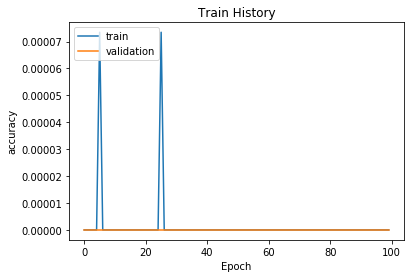

In [18]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

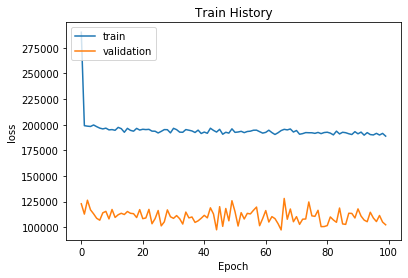

In [19]:
show_train_history(train_history, 'loss', 'val_loss')